The data set is about seoul bike rental . How many bikes are rented on daily basis

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [214]:
df=pd.read_csv('Desktop\\empiezoitsolutions\\tasks\\assignment\\assignment3\\SeoulBikeData.csv',encoding = 'ISO-8859-1',parse_dates=['Date'])

In [215]:
df.shape

(8760, 14)

In [216]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [217]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [218]:
df.rename(columns={'Date': 'date', 'Rented Bike Count': 'bike_count', 'Hour': 'hour',
                   'Temperature(°C)': 'temp', 'Humidity(%)': 'humidity', 'Wind speed (m/s)': 'wind',
                   'Visibility (10m)': 'visibility', 'Dew point temperature(°C)': 'dew_temp',
                   'Solar Radiation (MJ/m2)': 'sunlight', 'Rainfall(mm)': 'rain', 'Snowfall (cm)': 'snow',
                   'Seasons': 'season', 'Holiday': 'holiday', 'Functioning Day': 'functioning_day'}, inplace=True)

In [219]:
df.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [220]:
df.tail()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             8760 non-null   datetime64[ns]
 1   bike_count       8760 non-null   int64         
 2   hour             8760 non-null   int64         
 3   temp             8760 non-null   float64       
 4   humidity         8760 non-null   int64         
 5   wind             8760 non-null   float64       
 6   visibility       8760 non-null   int64         
 7   dew_temp         8760 non-null   float64       
 8   sunlight         8760 non-null   float64       
 9   rain             8760 non-null   float64       
 10  snow             8760 non-null   float64       
 11  season           8760 non-null   object        
 12  holiday          8760 non-null   object        
 13  functioning_day  8760 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(

In [222]:
df.describe()

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [223]:
df.isna().sum()

date               0
bike_count         0
hour               0
temp               0
humidity           0
wind               0
visibility         0
dew_temp           0
sunlight           0
rain               0
snow               0
season             0
holiday            0
functioning_day    0
dtype: int64

In [224]:
len(df[df.duplicated()])

0

In [225]:
df.describe().columns

Index(['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility',
       'dew_temp', 'sunlight', 'rain', 'snow'],
      dtype='object')

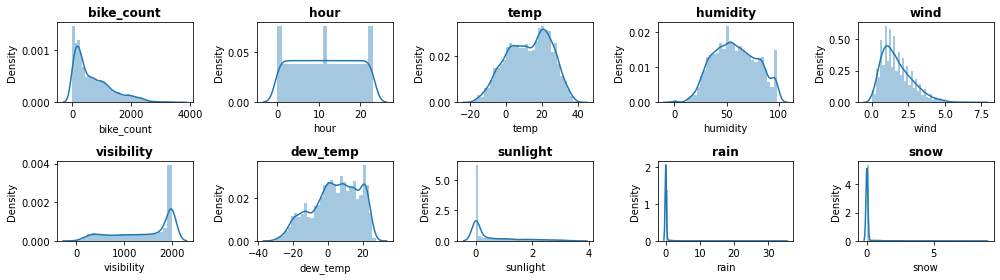

In [226]:
plt.figure(figsize=(14,4))
for n,column in enumerate(df.describe().columns): # Gives the index and the column name
  plt.subplot(2, 5, n+1) # 2 rows , 5 columns 
  sns.distplot(df[column]) # Distribution plot for each column
  plt.title(column,weight='bold')
  plt.tight_layout() # For good spacing and adjusting the padding

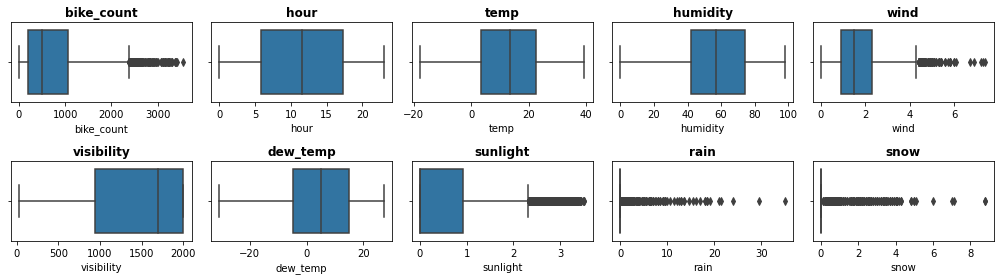

In [227]:
plt.figure(figsize=(14,4))
for n,column in enumerate(df.describe().columns): # Gives the index and the column name
  plt.subplot(2, 5, n+1) # 2 rows , 5 columns 
  sns.boxplot(df[column]) # Box plot for each column
  plt.title(column,weight='bold')
  plt.tight_layout() # For good spacing and adjusting the padding

In [228]:
q1,q2,q3=df.bike_count.quantile([0.25,0.5,0.75])

In [229]:
lower_limit=q1-1.5*(q3-q1)
upper_limit=q3+1.5*(q3-q1)

In [230]:
lower_limit

-1120.375

In [231]:
upper_limit

2376.625

In [232]:
df[(df.bike_count>lower_limit)&(df.bike_count<upper_limit)]

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [233]:
# Using Iqr method
# Syntax np.where if bike count is greater than upper limit then replace with 75
# percentile , else is bike count is lesser than lower limit then replace with
# 25th percentile else keep the value same
df['bike_count']=np.where(df['bike_count']>upper_limit,q3,np.where(
                          df['bike_count']<lower_limit,q1,df['bike_count']))

In [234]:
'''
# Using a function to remove outliers
column = ['bike_count','wind','sunlight','rain','snow']
for col in column:
    q1,q2,q3=df[col].quantile([0.25,0.5,0.75])
    lower_limit=q1-1.5*(q3-q1)
    upper_limit=q3+1.5*(q3-q1)
    df[col]=np.where(df[col]>upper_limit,q3,np.where(
            df[col]<lower_limit,q1,df[col]))
'''

"\n# Using a function to remove outliers\ncolumn = ['bike_count','wind','sunlight','rain','snow']\nfor col in column:\n    q1,q2,q3=df[col].quantile([0.25,0.5,0.75])\n    lower_limit=q1-1.5*(q3-q1)\n    upper_limit=q3+1.5*(q3-q1)\n    df[col]=np.where(df[col]>upper_limit,q3,np.where(\n            df[col]<lower_limit,q1,df[col]))\n"

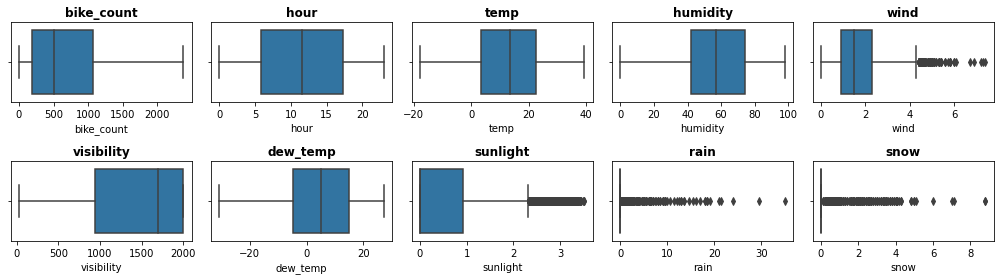

In [235]:
plt.figure(figsize=(14,4))
for n,column in enumerate(df.describe().columns): # Gives the index and the column name
  plt.subplot(2, 5, n+1) # 2 rows , 5 columns 
  sns.boxplot(df[column]) # Box plot for each column
  plt.title(column,weight='bold')
  plt.tight_layout() # For good spacing and adjusting the padding

In [236]:
for col in ['wind','sunlight','rain','snow']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

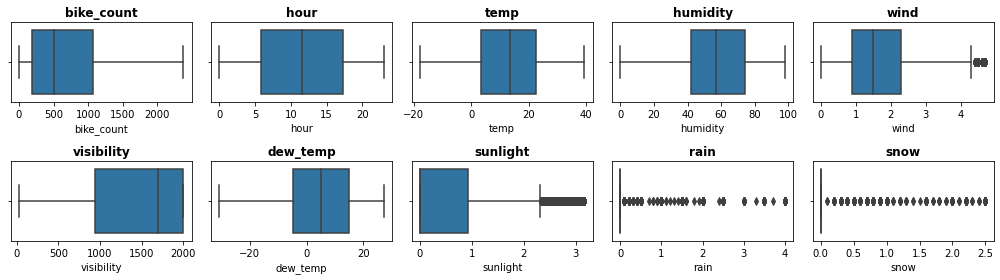

In [237]:
plt.figure(figsize=(14,4))
for n,column in enumerate(df.describe().columns): # Gives the index and the column name
  plt.subplot(2, 5, n+1) # 2 rows , 5 columns 
  sns.boxplot(df[column]) # Box plot for each column
  plt.title(column,weight='bold')
  plt.tight_layout() # For good spacing and adjusting the padding

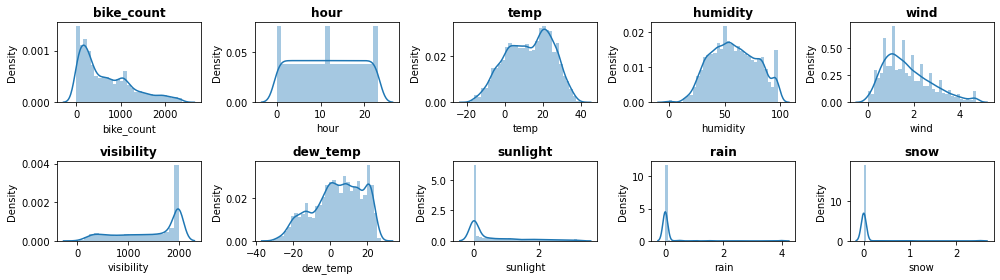

In [238]:
plt.figure(figsize=(14,4))
for n,column in enumerate(df.describe().columns): # Gives the index and the column name
  plt.subplot(2, 5, n+1) # 2 rows , 5 columns 
  sns.distplot(df[column]) # Distribution plot for each column
  plt.title(column,weight='bold')
  plt.tight_layout() # For good spacing and adjusting the padding

Cleaning The Dataset

In [239]:
df.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
0,2017-01-12,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [240]:
df['weekend']=df['date'].apply(lambda x : 1 if(x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0)


In [241]:
df.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,weekend
0,2017-01-12,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
1,2017-01-12,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
2,2017-01-12,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0
3,2017-01-12,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
4,2017-01-12,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0


In [242]:
df['timeshift']=df['hour'].apply(lambda x : 'night' if 0<=x<=6 else ('day' if 7<=x<=16 else 'evening'))

In [243]:
df.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,weekend,timeshift
0,2017-01-12,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,night
1,2017-01-12,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,night
2,2017-01-12,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0,night
3,2017-01-12,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,night
4,2017-01-12,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,night


In [244]:
df.drop(columns=['date'],inplace=True)

In [245]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,weekend,timeshift
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,night
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,night
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0,night
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,night
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,night


In [246]:
# Label Encoding
encoder = {'holiday':{'Holiday':1,'No Holiday':0},'functioning_day':{'Yes':1,'No':0},'timeshift':{'night':0,'day':1,'evening':2}}

In [247]:
df = df.replace(encoder)

In [248]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day,weekend,timeshift
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,0
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,0
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,0,0
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,0
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,0,0


In [249]:
# One Hot Encoding
df = pd.get_dummies(df, columns=["season"])

In [250]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,holiday,functioning_day,weekend,timeshift,season_Autumn,season_Spring,season_Summer,season_Winter
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,0,0,1
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1


Data Cleaning Complete

In [251]:
independent_variables = [i for i in df.columns if i not in ['bike_count']]

In [252]:
independent_variables

['hour',
 'temp',
 'humidity',
 'wind',
 'visibility',
 'dew_temp',
 'sunlight',
 'rain',
 'snow',
 'holiday',
 'functioning_day',
 'weekend',
 'timeshift',
 'season_Autumn',
 'season_Spring',
 'season_Summer',
 'season_Winter']

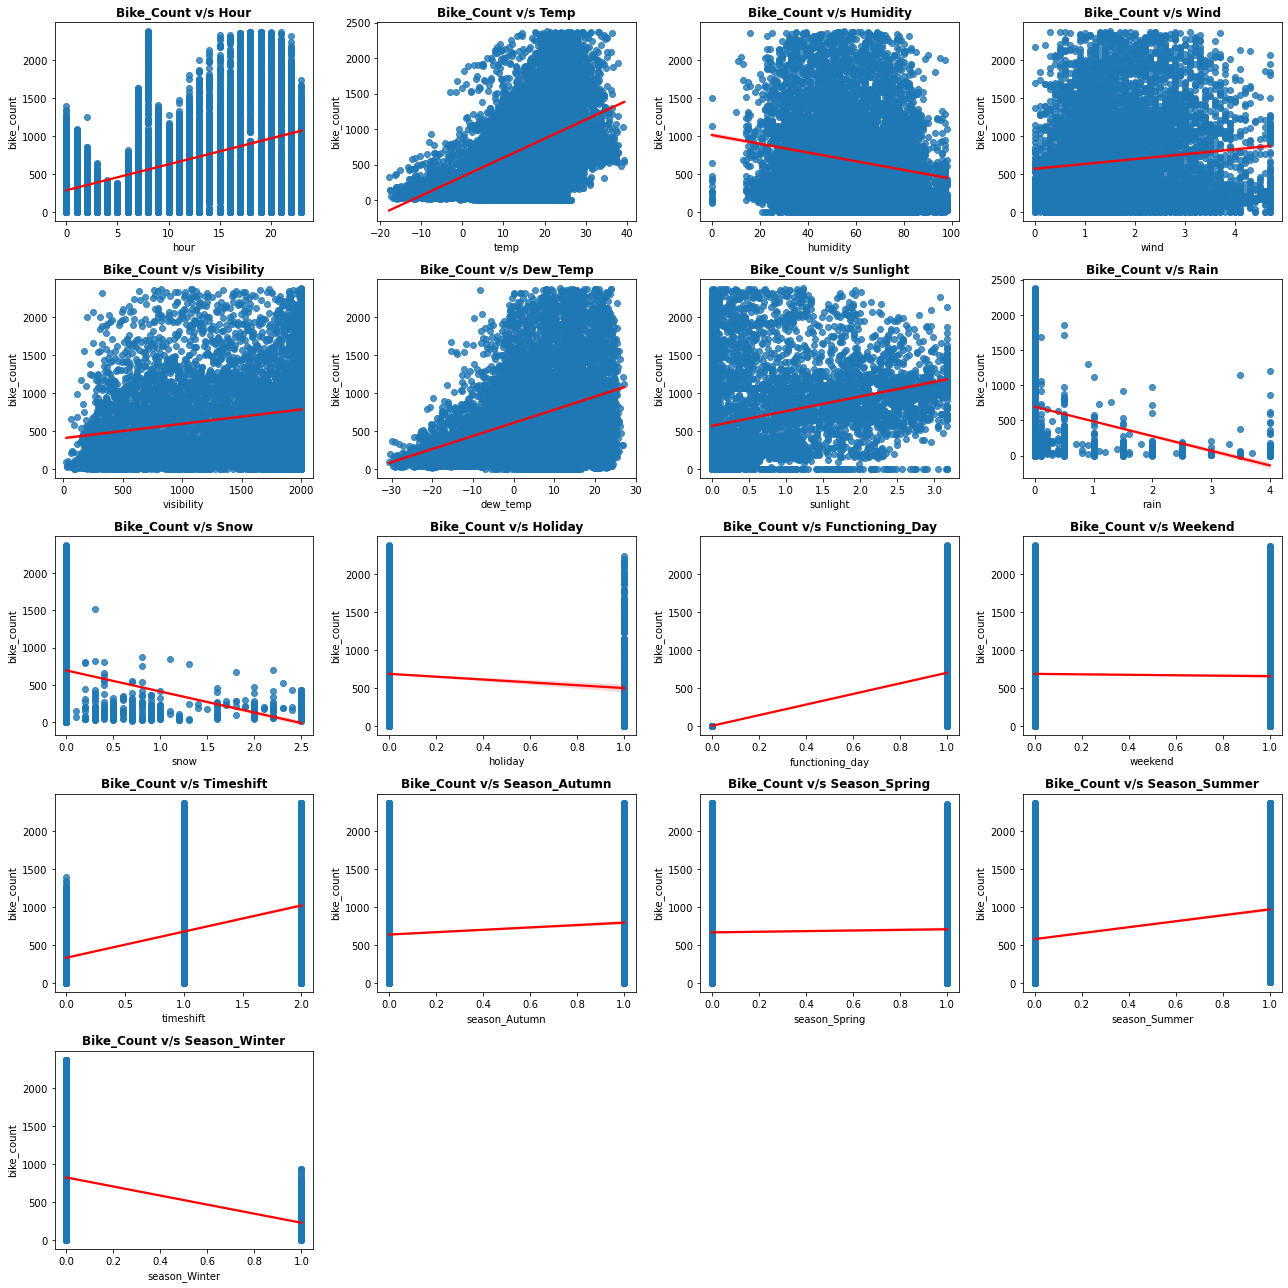

In [255]:
# Checking Linearity
plt.figure(figsize=(18,18))
for n,column in enumerate(independent_variables):
  plt.subplot(5, 4, n+1)
  sns.regplot(data = df, x = column, y ='bike_count',line_kws={"color":"red"}) # Regression plot
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

In [256]:
# Transforming Target Variable
print(f'Skewness of original data : {df.bike_count.skew()}')
print(f'Skewness after log transformation : {np.log(df.bike_count).skew()}')
print(f'Skewness after transformation : {np.sqrt(df.bike_count).skew()}')

Skewness of original data : 0.9278889417909876
Skewness after log transformation : nan
Skewness after transformation : 0.11399218877280863


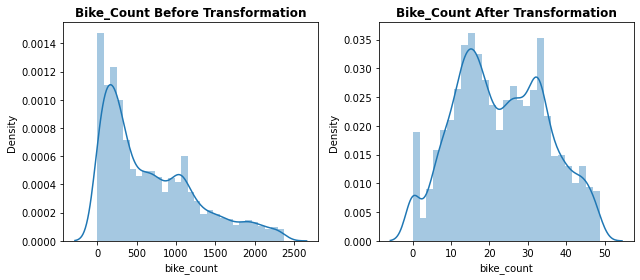

In [263]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.distplot(df['bike_count']).set_title('Bike_Count Before Transformation',weight='bold')
plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['bike_count'])).set_title('Bike_Count After Transformation',weight='bold')
plt.tight_layout()

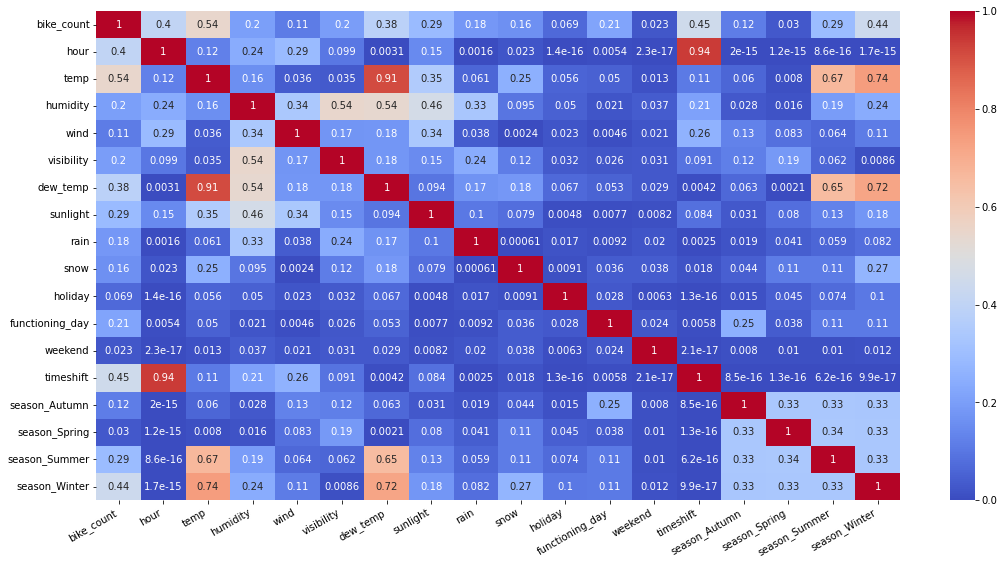

In [264]:
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [269]:
X=df[independent_variables]

In [270]:
X

,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,holiday,functioning_day,weekend,timeshift,season_Autumn,season_Spring,season_Summer,season_Winter
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,0,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,0,2,1,0,0,0
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,0,2,1,0,0,0
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,0,2,1,0,0,0
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,0,2,1,0,0,0


In [273]:
y = np.sqrt(df['bike_count'])

In [274]:
y

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: bike_count, Length: 8760, dtype: float64

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [276]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [277]:
X_train

array([[ 0.50774916, -0.38874606,  0.18996015, ..., -0.57866842,
        -0.57910781,  1.7507042 ],
       [ 0.9408263 ,  1.29850393, -0.05608294, ..., -0.57866842,
         1.72679419, -0.57119872],
       [-0.06968702,  1.42379477, -0.05608294, ..., -0.57866842,
         1.72679419, -0.57119872],
       ...,
       [-0.06968702,  1.05627497, -0.05608294, ..., -0.57866842,
         1.72679419, -0.57119872],
       [-1.65763652, -0.38039334,  0.0423343 , ...,  1.72810536,
        -0.57910781, -0.57119872],
       [ 1.22954439, -0.48062601,  1.22334111, ...,  1.72810536,
        -0.57910781, -0.57119872]])

In [278]:
X_test

array([[-1.22455939, -0.17992799,  0.73125494, ...,  1.72810536,
        -0.57910781, -0.57119872],
       [-1.36891843,  0.73887151,  0.97729803, ..., -0.57866842,
        -0.57910781, -0.57119872],
       [ 0.79646725, -0.7729713 ,  0.337586  , ..., -0.57866842,
        -0.57910781,  1.7507042 ],
       ...,
       [-1.65763652, -0.2551025 ,  1.37096697, ...,  1.72810536,
        -0.57910781, -0.57119872],
       [ 1.51826248, -0.04628443,  0.337586  , ..., -0.57866842,
        -0.57910781, -0.57119872],
       [-1.65763652, -0.21333888,  0.43600324, ..., -0.57866842,
        -0.57910781, -0.57119872]])

In [279]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor # Bagging boost <--> Random Forest
from sklearn.ensemble import AdaBoostRegressor

In [281]:
from sklearn import metrics

In [286]:
#Finding the number of n_estimators
for n in range(1,50):
      rc =AdaBoostRegressor(n_estimators=n,learning_rate=1)
      rc.fit(X_train, y_train)
      y_pred = rc.predict(X_test)
      print("RMSE for %s estimators :%s" %(n,np.sqrt(metrics.mean_squared_error(y_test, y_pred))))


RMSE for 1 estimators :8.488196645156691
RMSE for 2 estimators :8.266697593193195
RMSE for 3 estimators :6.663817390421686
RMSE for 4 estimators :6.656708435159359
RMSE for 5 estimators :6.8290524852570025
RMSE for 6 estimators :7.28263202539152
RMSE for 7 estimators :6.492639683692944
RMSE for 8 estimators :6.4088226824806505
RMSE for 9 estimators :6.04188909531491
RMSE for 10 estimators :6.349050789440603
RMSE for 11 estimators :6.16446051951238
RMSE for 12 estimators :6.28134869864149
RMSE for 13 estimators :6.27544766305625
RMSE for 14 estimators :6.127559549562171
RMSE for 15 estimators :6.2522467227711465
RMSE for 16 estimators :6.1319713269134715
RMSE for 17 estimators :6.060787724700893
RMSE for 18 estimators :6.084557807351377
RMSE for 19 estimators :6.200931786960936
RMSE for 20 estimators :6.372565703466858
RMSE for 21 estimators :6.1569268460027935
RMSE for 22 estimators :6.350839140329217
RMSE for 23 estimators :6.150033925960188
RMSE for 24 estimators :6.219615417786306
R

In [291]:
for n in range(1,50):
      rc =GradientBoostingRegressor(max_depth=1,n_estimators =n,learning_rate=1)
      rc.fit(X_train, y_train)
      y_pred = rc.predict(X_test)
      print("RMSE for %s estimators :%s" %(n,np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE for 1 estimators :10.822452777640992
RMSE for 2 estimators :9.366910944471362
RMSE for 3 estimators :8.139515258248283
RMSE for 4 estimators :7.3469140618856
RMSE for 5 estimators :7.013620963228056
RMSE for 6 estimators :6.88833384629179
RMSE for 7 estimators :6.770756986412047
RMSE for 8 estimators :6.515542589120855
RMSE for 9 estimators :6.443360681654185
RMSE for 10 estimators :6.374912926885676
RMSE for 11 estimators :6.300405937506349
RMSE for 12 estimators :6.274660508955522
RMSE for 13 estimators :6.214167062618378
RMSE for 14 estimators :6.104518860995341
RMSE for 15 estimators :6.067785233042818
RMSE for 16 estimators :6.028862116146177
RMSE for 17 estimators :6.004467863434846
RMSE for 18 estimators :5.980122209506536
RMSE for 19 estimators :5.967268589181348
RMSE for 20 estimators :5.932939303786224
RMSE for 21 estimators :5.896688951948637
RMSE for 22 estimators :5.872755990883506
RMSE for 23 estimators :5.8409281184461515
RMSE for 24 estimators :5.839305355180617
RM

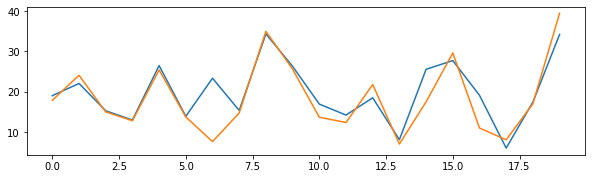

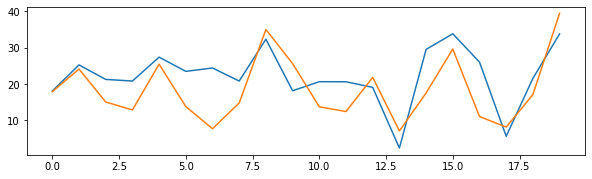

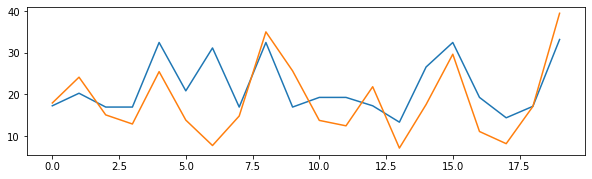

In [300]:
rfr = RandomForestRegressor(n_estimators=5,random_state=0)
gbr = GradientBoostingRegressor(max_depth=1,n_estimators =45,learning_rate=1.0)
abr= AdaBoostRegressor(n_estimators = 9,learning_rate=1)
d1={}

for rr in rfr,gbr,abr:
    rr.fit(X_train, y_train)
    y_pred = rr.predict(X_test)
    d1[rr]= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    plt.figure(figsize=(10,6))
    plt.title(rr)
    plt.subplot(2,1,1)
    plt.plot((y_pred)[:20])
    plt.plot((np.array(y_test)[:20]))

In [296]:
for k,v in d1.items():
    print(k," : ",v)

RandomForestRegressor(n_estimators=5, random_state=0)  :  4.152139855983879
GradientBoostingRegressor(learning_rate=1.0, max_depth=1, n_estimators=45)  :  5.546086622973359
AdaBoostRegressor(learning_rate=1, n_estimators=9)  :  6.211876059475063


1. Random Forest Regressor
2. Gradient Descent Regressor
3. Ada Boost Regressor